<font size="+1">This notebook will illustrate how to access DeepLabCut(DLC) results for IBL sessions and how to create short videos with DLC labels printed onto, as well as wheel angle, starting by downloading data from the IBL flatiron server. It requires ibllib, a ONE account and the following script: https://github.com/int-brain-lab/iblapps/blob/master/DLC_labeled_video.py</font>

In [1]:
run '/home/mic/Dropbox/scripts/IBL/DLC_labeled_video.py'

In [2]:
one = ONE()

Connected to https://alyx.internationalbrainlab.org as michael.schartner


Let's first find IBL ephys sessions with DLC results:

In [3]:
eids= one.search(task_protocol='ephysChoiceworld', dataset_types=['camera.dlc'], details=False)

In [4]:
len(eids)

47

For a particular session, we can create a short labeled video by calling the function Viewer, specifying the eid of the desired session, the video type (there's 'left', 'right' and 'body' videos), and a range of trials for which the video should be created. Most sesions have around 700 trials. In the following, this is illustrated with session '3663d82b-f197-4e8b-b299-7b803a155b84', video type 'left', trials range [10,13] and without a zoom for the eye, such that nose, paw and tongue tracking is visible. The eye-zoom option shows only the four points delineating the pupil edges, which are too small to be visible in the normal view. Note that this automatically starts the download of the video from flatiron (in case it is not locally stored already), which may take a while since these videos are about 8 GB large.  

In [5]:
eid = eids[6]

In [6]:
Viewer(eid, 'left', [10,13], save_video=True, eye_zoom=False)

Connected to https://alyx.internationalbrainlab.org as michael.schartner
Connected to https://alyx.internationalbrainlab.org as michael.schartner


Inconsistent dimensions for object:_ibl_leftCamera
(379271,),    times
(379265,),    nose_tip_x
(379265,),    nose_tip_y
(379265,),    nose_tip_likelihood
(379265,),    pupil_top_r_x
(379265,),    pupil_top_r_y
(379265,),    pupil_top_r_likelihood
(379265,),    pupil_right_r_x
(379265,),    pupil_right_r_y
(379265,),    pupil_right_r_likelihood
(379265,),    pupil_bottom_r_x
(379265,),    pupil_bottom_r_y
(379265,),    pupil_bottom_r_likelihood
(379265,),    pupil_left_r_x
(379265,),    pupil_left_r_y
(379265,),    pupil_left_r_likelihood
(379265,),    paw_l_x
(379265,),    paw_l_y
(379265,),    paw_l_likelihood
(379265,),    paw_r_x
(379265,),    paw_r_y
(379265,),    paw_r_likelihood
(379265,),    tube_top_x
(379265,),    tube_top_y
(379265,),    tube_top_likelihood
(379265,),    tube_bottom_x
(379265,),    tube_bottom_y
(379265,),    tube_bottom_likelihood
(379265,),    tongue_end_l_x
(379265,),    tongue_end_l_y
(379265,),    tongue_end_l_likelihood
(379265,),    tongue_end_r_x
(37

As usual when downloading IBL data from flatiron, the dimensions are listed. Below is one frame of the video for illustration. One can see one point for each paw, two points for the edges of the tongue, one point for the nose and there are 4 points close together around the pupil edges. All points for which the DLC network had a confidence probability of below 0.9 are hidden. For instance when the mouse is not licking, there is no tongue and so the network cannot detect it, and no points are shown. 

The script will display and save the short video in your local folder. 

![alt text](video_frame.png "Example frame of video with DLC labels")

Sections of the script <code>DLC_labeled_video.py</code> can be recycled to analyse DLC traces. For example let's plot the x coordinate for the right paw in a <code>'left'</code> cam video for a given trial. 

In [2]:
one = ONE()

Connected to https://alyx.internationalbrainlab.org as michael.schartner


In [12]:
dataset_types = ['camera.times','trials.intervals','camera.dlc']
video_type = 'left'

In [13]:
# get paths to load in data
D = one.load('3663d82b-f197-4e8b-b299-7b803a155b84',dataset_types=dataset_types, dclass_output=True)
alf_path = Path(D.local_path[0]).parent.parent / 'alf'
video_data = alf_path.parent / 'raw_video_data'

In [14]:
# get trials start and end times, camera time stamps (one for each frame, synced with DLC trace)
trials = alf.io.load_object(alf_path, '_ibl_trials')
cam0 = alf.io.load_object(alf_path, '_ibl_%sCamera' % video_type)
cam1 = alf.io.load_object(video_data, '_ibl_%sCamera' % video_type)
cam = {**cam0,**cam1}

Inconsistent dimensions for object:_ibl_trials
(893,),    itiDuration
(767,),    stimOn_times
(767, 2),    intervals
(893,),    feedbackType
(893,),    choice
(893,),    rewardVolume
(767,),    feedback_times
(893,),    contrastRight
(893,),    probabilityLeft
(893,),    contrastLeft
(767,),    goCue_times
Inconsistent dimensions for object:_ibl_leftCamera
(379271,),    times
(379265,),    nose_tip_x
(379265,),    nose_tip_y
(379265,),    nose_tip_likelihood
(379265,),    pupil_top_r_x
(379265,),    pupil_top_r_y
(379265,),    pupil_top_r_likelihood
(379265,),    pupil_right_r_x
(379265,),    pupil_right_r_y
(379265,),    pupil_right_r_likelihood
(379265,),    pupil_bottom_r_x
(379265,),    pupil_bottom_r_y
(379265,),    pupil_bottom_r_likelihood
(379265,),    pupil_left_r_x
(379265,),    pupil_left_r_y
(379265,),    pupil_left_r_likelihood
(379265,),    paw_l_x
(379265,),    paw_l_y
(379265,),    paw_l_likelihood
(379265,),    paw_r_x
(379265,),    paw_r_y
(379265,),    paw_r_likeliho

In [16]:
# for each tracked point there's x,y in [px] in the frame and a likelihood that indicates the network's confidence
cam.keys()

dict_keys(['times', 'nose_tip_x', 'nose_tip_y', 'nose_tip_likelihood', 'pupil_top_r_x', 'pupil_top_r_y', 'pupil_top_r_likelihood', 'pupil_right_r_x', 'pupil_right_r_y', 'pupil_right_r_likelihood', 'pupil_bottom_r_x', 'pupil_bottom_r_y', 'pupil_bottom_r_likelihood', 'pupil_left_r_x', 'pupil_left_r_y', 'pupil_left_r_likelihood', 'paw_l_x', 'paw_l_y', 'paw_l_likelihood', 'paw_r_x', 'paw_r_y', 'paw_r_likelihood', 'tube_top_x', 'tube_top_y', 'tube_top_likelihood', 'tube_bottom_x', 'tube_bottom_y', 'tube_bottom_likelihood', 'tongue_end_l_x', 'tongue_end_l_y', 'tongue_end_l_likelihood', 'tongue_end_r_x', 'tongue_end_r_y', 'tongue_end_r_likelihood'])

There is also <code>'times'</code> in this dictionary, the time stamps for each frame that we'll use to sync it with other events in the experiment. Let's get rid of it briefly to have only DLC points and set coordinates to nan when the likelihood is below 0.9.  

In [17]:
Times = cam['times']   
del cam['times']
points = np.unique(['_'.join(x.split('_')[:-1]) for x in cam.keys()])
cam['times'] = Times

In [19]:
# A helper function to find closest time stamps
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

Let's pick say the 5th trial and find all DLC traces for it.

In [20]:
frame_start = find_nearest(cam['times'], trials['intervals'][4][0])
frame_stop = find_nearest(cam['times'], trials['intervals'][4][1])

In [29]:
XYs = {}
for point in points:
    x = np.ma.masked_where(
        cam[point + '_likelihood'] < 0.9, cam[point + '_x'])
    x = x.filled(np.nan)
    y = np.ma.masked_where(
        cam[point + '_likelihood'] < 0.9, cam[point + '_y'])
    y = y.filled(np.nan)
    XYs[point] = np.array(
        [x[frame_start:frame_stop], y[frame_start:frame_stop]])

In [27]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'x location of right paw [px]')

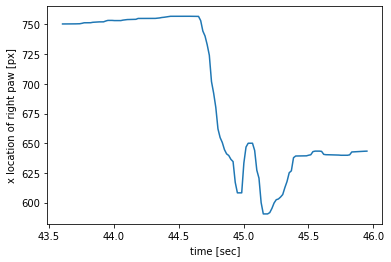

In [34]:
plt.plot(cam['times'][frame_start:frame_stop],XYs['paw_r'][0])
plt.xlabel('time [sec]')
plt.ylabel('x location of right paw [px]')